In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

In [ ]:
print(os.getcwd())

In [3]:
your_cab = pd.read_csv('YourCabs.csv')

In [4]:
your_cab

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,2,NaN,1147.0,452.0,15.0,NaN,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,185938,48727,12,2,NaN,393.0,466.0,15.0,NaN,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,185939,48729,12,3,1.0,974.0,NaN,15.0,NaN,11/24/2013 18:30,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0
43429,185940,30724,87,2,NaN,1263.0,542.0,15.0,NaN,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [5]:
your_cab.shape

(43431, 18)

In [6]:
your_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   travel_type_id       43431 non-null  int64  
 4   package_id           7550 non-null   float64
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [7]:
your_cab.describe()

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,43431.000000,7550.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.137252,2.030066,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,0.437712,1.461756,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,2.000000,1.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,3.000000,7.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


In [7]:
your_cab.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
travel_type_id             0
package_id             35881
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

In [8]:
your_cab.duplicated().sum()

0

In [9]:
#Data Preprocessing
#1. Handling Missing Values
your_cab.drop(['from_city_id', 'to_city_id'], axis=1, inplace=True)

In [10]:
your_cab['package_id'].fillna(0, inplace=True)

mode_from_area = your_cab['from_area_id'].mode()[0]
your_cab['from_area_id'].fillna(mode_from_area, inplace=True)

mode_to_area = your_cab['to_area_id'].mode()[0]
your_cab['to_area_id'].fillna(mode_to_area, inplace=True)

In [11]:
your_cab['from_lat'] = your_cab.groupby('from_area_id')['from_lat'].transform(lambda x: x.fillna(x.mean()))
your_cab['from_long'] = your_cab.groupby('from_area_id')['from_long'].transform(lambda x: x.fillna(x.mean()))

your_cab['to_lat'] = your_cab.groupby('to_area_id')['to_lat'].transform(lambda x: x.fillna(x.mean()))
your_cab['to_long'] = your_cab.groupby('to_area_id')['to_long'].transform(lambda x: x.fillna(x.mean()))

In [12]:
your_cab.dropna(inplace=True)

In [13]:
your_cab

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,2,0.0,83.0,448.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,2,0.0,1010.0,540.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,2,0.0,1301.0,1034.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,2,0.0,768.0,398.0,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,2,0.0,1365.0,849.0,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,2,0.0,1147.0,452.0,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,185938,48727,12,2,0.0,393.0,466.0,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,185939,48729,12,3,1.0,974.0,393.0,11/24/2013 18:30,0,0,11/24/2013 14:35,13.075570,77.559040,13.199560,77.706880,0
43429,185940,30724,87,2,0.0,1263.0,542.0,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [14]:
your_cab.isnull().sum()

id                     0
user_id                0
vehicle_model_id       0
travel_type_id         0
package_id             0
from_area_id           0
to_area_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
to_lat                 0
to_long                0
Car_Cancellation       0
dtype: int64

In [15]:
#2. Converting Dtype 'Objects' into 'DateTime'
your_cab['from_date'] = pd.to_datetime(your_cab['from_date'],  dayfirst=True, errors='coerce')
your_cab['booking_created'] = pd.to_datetime(your_cab['booking_created'], dayfirst=True, errors='coerce')

In [16]:
your_cab['from_date'].fillna(your_cab['from_date'].mode()[0], inplace=True)
your_cab['booking_created'].fillna(your_cab['booking_created'].mode()[0], inplace=True)

In [17]:
#3. Feature Engineering
your_cab['ride_hour'] = your_cab['from_date'].dt.hour
your_cab['ride_dayofweek'] = your_cab['from_date'].dt.dayofweek

your_cab['booking_hour'] = your_cab['booking_created'].dt.hour
your_cab['booking_dayofweek'] = your_cab['booking_created'].dt.dayofweek

your_cab['booking_advance_hours'] = (your_cab['from_date'] - your_cab['booking_created']).dt.total_seconds()/3600

your_cab['is_same_day_booking'] = (your_cab['from_date'].dt.date == your_cab['booking_created'].dt.date).astype(int)

In [18]:
#Doing some changes as per the ppt
your_cab.drop(['id', 'user_id', 'from_long', 'from_lat', 'to_long', 'to_lat'], axis=1, inplace=True)

In [19]:
your_cab['is_VMID_12'] = (your_cab['vehicle_model_id'] == 12).astype(int)
your_cab.drop('vehicle_model_id', axis=1, inplace=True)

In [20]:
#Dividing the data into 3 datasets
your_cab_1 = your_cab[your_cab['travel_type_id'] == 1].copy()
your_cab_2 = your_cab[your_cab['travel_type_id'] == 2].copy()
your_cab_3 = your_cab[your_cab['travel_type_id'] == 3].copy()

In [21]:
#EDA
your_cab['Car_Cancellation'].value_counts(normalize=True) * 100

Car_Cancellation
0    92.787731
1     7.212269
Name: proportion, dtype: float64

In [22]:
#Create Model 1 your_cab_1
model = RandomForestClassifier(class_weight='balanced')

In [23]:
features = [
    'from_area_id', 'online_booking', 'mobile_site_booking',
    'ride_hour', 'ride_dayofweek', 'booking_hour',
    'booking_dayofweek', 'booking_advance_hours', 'is_same_day_booking', 'is_VMID_12'
]

X = your_cab_1[features]
y = your_cab_1['Car_Cancellation']

In [24]:
#Train-test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [25]:
#Train Random Forest
rf = RandomForestClassifier(
    class_weight='balanced',  # handles imbalance
    n_estimators=100,         # number of trees
    max_depth=None,           # let it grow fully
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [26]:
#Predict Model
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]  # probability of class 1

In [27]:
#Evaluate Model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       313
           1       0.00      0.00      0.00         4

    accuracy                           0.98       317
   macro avg       0.49      0.50      0.49       317
weighted avg       0.97      0.98      0.98       317

Confusion Matrix:
 [[310   3]
 [  4   0]]


In [28]:
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

ROC AUC Score: 0.6409744408945687


In [29]:
#Now Model 2 your_cab_2
#Data Preprocessing
your_cab_2.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,ride_hour,ride_dayofweek,booking_hour,booking_dayofweek,booking_advance_hours,is_same_day_booking,is_VMID_12
0,2,0.0,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,0,2,1,1,1,0.350000,1,0
1,2,0.0,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,0,9,1,2,1,6.583333,1,1
2,2,0.0,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,0,3,1,3,1,0.366667,1,1
3,2,0.0,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,0,5,1,4,1,1.100000,1,1
4,2,0.0,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,0,9,1,7,1,1.116667,1,1


In [30]:
your_cab_2.drop(['travel_type_id', 'from_date', 'booking_created'], axis=1, inplace=True)

In [31]:
your_cab_2.head()

,package_id,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,ride_hour,ride_dayofweek,booking_hour,booking_dayofweek,booking_advance_hours,is_same_day_booking,is_VMID_12
0,0.0,83.0,448.0,0,0,0,2,1,1,1,0.350000,1,0
1,0.0,1010.0,540.0,0,0,0,9,1,2,1,6.583333,1,1
2,0.0,1301.0,1034.0,0,0,0,3,1,3,1,0.366667,1,1
3,0.0,768.0,398.0,0,0,0,5,1,4,1,1.100000,1,1
4,0.0,1365.0,849.0,0,0,0,9,1,7,1,1.116667,1,1


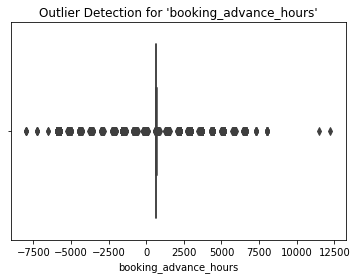

In [32]:
#Finding Outliers in booking_advance_hours
sns.boxplot(x=your_cab_2['booking_advance_hours'])
plt.title("Outlier Detection for 'booking_advance_hours'")
plt.show()

In [33]:
Q1 = your_cab_2['booking_advance_hours'].quantile(0.25)
Q3 = your_cab_2['booking_advance_hours'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = your_cab_2[(your_cab_2['booking_advance_hours'] < lower_bound) | (your_cab_2['booking_advance_hours'] > upper_bound)]
print("Number of outliers:", len(outliers))

Number of outliers: 13328


In [34]:
#Converting booking_advance_hours into booking_nature
def categorize_booking(hours):
    if hours <= 1:
        return 'Urgent'
    elif hours <= 5:
        return 'SameDay'
    elif hours <= 24:
        return 'Regular'
    else :
        return 'Advance'

In [35]:
your_cab_2['booking_nature'] = your_cab_2['booking_advance_hours'].apply(categorize_booking)

In [36]:
your_cab_2.drop(['booking_advance_hours'], axis=1, inplace=True)

In [37]:
your_cab_2.head()

,package_id,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,ride_hour,ride_dayofweek,booking_hour,booking_dayofweek,is_same_day_booking,is_VMID_12,booking_nature
0,0.0,83.0,448.0,0,0,0,2,1,1,1,1,0,Urgent
1,0.0,1010.0,540.0,0,0,0,9,1,2,1,1,1,Regular
2,0.0,1301.0,1034.0,0,0,0,3,1,3,1,1,1,Urgent
3,0.0,768.0,398.0,0,0,0,5,1,4,1,1,1,SameDay
4,0.0,1365.0,849.0,0,0,0,9,1,7,1,1,1,SameDay


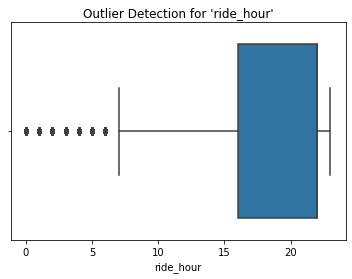

In [38]:
#Finding Outlier for ride_hour
sns.boxplot(x=your_cab_2['ride_hour'])
plt.title("Outlier Detection for 'ride_hour'")
plt.show()

In [39]:
Q1 = your_cab_2['ride_hour'].quantile(0.25)
Q3 = your_cab_2['ride_hour'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = your_cab_2[(your_cab_2['ride_hour'] < lower_bound) | (your_cab_2['ride_hour'] > upper_bound)]
print("Number of Outliers:", len(outliers))

Number of Outliers: 3223
